In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from collections import Counter
from itertools import product
import itertools
import math
import random

Implement the following functions for the MLPClassifier model class. Implement
additional functions as needed.

#### 1. Implement the following function that creates a weight matrix and initializes it with small random real numbers.

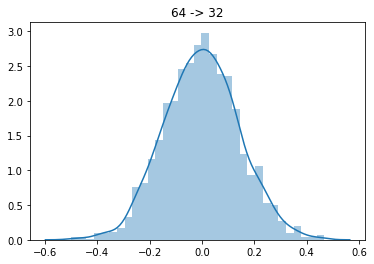

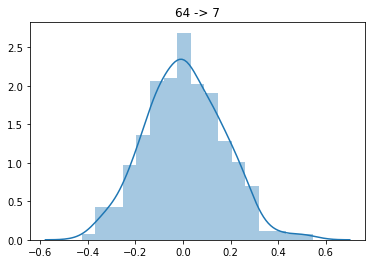

In [204]:
def initializeTheta(_in, out):
    """
    params:
        in : int
            number of input neurons/features.
        out : int
            number of output neurons/features.

    returns:
        Theta : ndarray
            The weight matrix initialized by small random number
    """
    
    fan_avg = (_in + out)/2
    
    return np.random.randn(_in, out)*np.sqrt(1/fan_avg)

plt.title("64 -> 32")
sns.distplot(initializeTheta(64, 32).reshape((64*32,)))
plt.show()

plt.title("64 -> 7")
sns.distplot(initializeTheta(64, 7).reshape((64*7,)))
plt.show()

#### 2. Implement the logistic sigmoid activation function. 

In [166]:
def logistic(z):
    """
    params:
        z : ndarray

    returns:
        An ndarray containing the logistic sigmoid values of the input.
    """
    
    return 1/(1 + np.exp(-z))

logistic(np.array([1, 2, 3, -5, -3, 0]))

array([0.73105858, 0.88079708, 0.95257413, 0.00669285, 0.04742587,
       0.5       ])

In [169]:
def logistic_derivative(z):
    activated = logistic(z)
    return activated*(1 - activated) 

logistic_derivative(np.array([1, 2, 3, -5, -3, 0]))

array([0.19661193, 0.10499359, 0.04517666, 0.00664806, 0.04517666,
       0.25      ])

#### 3. Implement the ReLU (rectified linear unit) activation function. [3 pts] 

In [22]:
def relu(z):
    """
    params:
        z : ndarray

    returns:
        An ndarray containing the relu output values of the input.
    """
    
    return np.maximum(0, z)

relu(np.array([1, 2, 3, -5, -3, 0]))

array([1, 2, 3, 0, 0, 0])

In [23]:
def relu_derivative(z):
    return (z > 1).astype(int)

relu_derivative(np.array([1, 2, 3, -5, -3, 0]))

array([0, 1, 1, 0, 0, 0])

#### 4. Implement the tanh (hyperbolic tangent) activation function. [3 pts]

In [24]:
def tanh(z):
    """
    params:
        z: ndarray

    returns:
        An ndarray containing the tanh output values of the input.
    """
    
    return np.tanh(z)

tanh(np.array([1, 2, 3, -5, -3, 0]))

array([ 0.76159416,  0.96402758,  0.99505475, -0.9999092 , -0.99505475,
        0.        ])

In [25]:
def tanh_derivative(z):
    return 1 - np.tanh(z)**2

tanh_derivative(np.array([1, 2, 3, -5, -3, 0]))

array([4.19974342e-01, 7.06508249e-02, 9.86603717e-03, 1.81583231e-04,
       9.86603717e-03, 1.00000000e+00])

##### 5. Implement a MLPClassifier model class. 
It has a single hidden layer. It should
have the following three methods. The model uses the backpropagation
algorithm for learning the weights of the features/neurons. Note the that “fit”
method should implement the Stochastic Gradient Descent algorithm for
optimizing the weight update process

Multi-Layer Perceptron Classifier

In [26]:
def one_hot_labels(Y):
    """
    params
        Y : ndarray
            1D array containing data with “int” type that represents class indices/labels
        
    rets
        Y_one_hot : ndarray
            2d array, one row for each entry in y, one col for each class in y
            
    """
    
    unique = np.unique(Y)
    lookup = {c:i for i,c in enumerate(unique)}
    Y_one_hot = np.zeros((len(Y), len(unique)))
    
    for i, val in enumerate(Y):
        Y_one_hot[i][lookup[val]] = 1
        
    return Y_one_hot, unique

In [27]:
def softmax(score):
    """
    params
        score : ndarry
            Score of sample belonging to various classes
            
    returns
        Y_proba : ndarray
            Probability of sample belonging to various classes
    """
    
    score = np.exp(score)
    return score/np.sum(score)
    
softmax([1, 2])

array([0.26894142, 0.73105858])

In [28]:
def cross_entropy_loss(Y_one_hot, Y_proba):
    """
    params
        Y_one_hot : ndarray
            A matrix containing a one-hot vector of class indices/labels for each instance.
        Y_proba : ndarray
            Probability of a sample belonging to various classes.
            
    returns
        cost : float
    """
    
    cost = np.sum(Y_one_hot * np.log(Y_proba))
    if str(cost)=='nan':
        print('yikes')
        print(Y_proba)
    return cost
    

In [234]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [233]:
def partition(X, Y, fraction):
    n = int(len(Y)*(1-fraction))
    return X[n:], Y[n:], X[:n], Y[:n]

In [96]:
def add_bias_term_to_start(np_array, array=None):
    if array is None:
        ones = np.ones(len(np_array))
        ones = ones.reshape((ones.shape[0],1))
    else:
        ones = array
    
    assert(ones.shape[0] == len(np_array))
    
    biased = np.hstack((ones, np_array))
    return biased

result = add_bias_term_to_start(x_train)
print(result.shape)
print(result)

(1438, 65)
[[1.     0.     0.     ... 0.1875 0.     0.    ]
 [1.     0.     0.     ... 0.5    0.     0.    ]
 [1.     0.     0.     ... 0.0625 0.     0.    ]
 ...
 [1.     0.     0.     ... 0.9375 0.25   0.    ]
 [1.     0.     0.     ... 1.     0.625  0.    ]
 [1.     0.     0.125  ... 0.9375 0.1875 0.    ]]


(1294, 65)
Early Stopping because the validation score change etween two consecutive epochs is less than 0.0001 over the last value of 10) iterations.
[0 1 2 3 4 5 6 7 8 9]
[2 7 9 ... 7 2 3]
[2 7 8 ... 4 0 1]
Train accuracy 0.3344923504867872
Test accuracy 0.28690807799442897


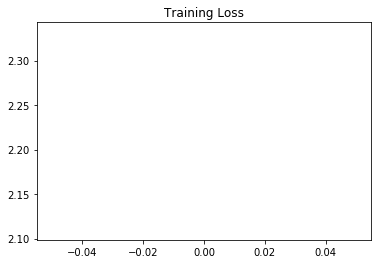

In [243]:
class MLPClassifier():        
    def fit(self, X, Y, hidden_layer_neurons = 2, activation = 'logistic', regularizer = None,
        alpha = 0.0001, learning_rate = 'constant', learning_rate_init = 0.001,
        max_iter = 1000, tol = 0.0001, verbose = False, early_stopping = False,
        validation_fraction = 0.1, n_iter_no_change = 10, **kwargs):
        """
        params:
            X : ndarray
                A numpy array with rows representing data samples and columns representing features.
                
            Y : ndarray
                A 1D numpy array with labels corresponding to each row of the feature matrix X.
                
            hidden_layer_neurons : int
                It provides the number of neurons in the hidden layer (excluding the bias unit).
                
            activation : string (default ‘logistic’)
                Activation function for the hidden layer.
                    - 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
                    - 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).
                    - 'relu', the rectified linear unit function, returns f(x) = max(0, x)
                    
            regularizer : string
                The string value could be one of the following: 
                    l2, None.
                If it’s set to None, the cost function without the regularization term will be used for computing the
                gradient and updating the weight vector. However, if it’s set to l2, the appropriate regularized cost 
                function needs to be used for computing the gradient and updating the weight vector.
 

                Note: you may define a helper function for computing the
                regularized cost using “l2” regularizer.
            
            alpha : float
                It provides the regularization coefficient. It is used only when the “regularizer” is set to l2.
            
            learning_rate : string (default ‘constant’)
                Learning rate schedule for weight updates.
                    - 'constant': a constant learning rate given by 'learning_rate_init'.
                    - 'adaptive': gradually decreases the learning rate based on a schedule or some heuristic. 
                        Write a function that would be used if learning_rate is set to ‘adaptive’. 
                        [Extra Credit for 478 and Mandatory for 878] [10 pts]

                Note on defining the “adaptive” learning_rate function:
                    There are different heuristics to write an adapting learning rate function. 
                    You are encouraged to explore existing functions in the literature, or try a 
                    new one. Here are some suggestions for you.
                        - Decrease learning rate gradually during each epoch:
                        Learning rate = a/(epoche+b)
                        where a and b are two constants that
                        you need to determine empirically. Choose constant a and b
                        such that initially the learning rate is large enough.
                        - Divide the initial learning rate by some constant: This will
                        require validation data (you need to implement ‘early
                        stopping’). The function keeps the learning rate constant to
                        ‘learning_rate_init’ as long as validation loss keeps decreasing.
                        Each time two consecutive epochs, within ‘n_iter_no_change’
                        number of epochs, fail to decrease validation loss by at least
                        tol, or fail to increase validation score by at least tol, the
                        current learning rate is divided by a constant (e.g., 2).
            
            learning_rate_init : double
                The initial learning rate used. It controls the step-size in updating
                the weights.

            max_iter : int
                Maximum number of iterations. The solver iterates until
                convergence (determined by ‘tol’) or this number of iterations. For
                Stochastic Gradient Descent, note that this determines the number of
                epochs (how many times each data point will be used), not the number of
                gradient steps.

            tol : float
                Tolerance for the optimization. When the loss or score is not
                improving by at least tol for n_iter_no_change consecutive iterations,
                unless learning_rate is set to ‘adaptive’, convergence is considered to be
                reached and training stops.
                
            verbose : bool
                Whether to print the following progress messages at each epoch to
                stdout.
                    - Epoch number, Training loss, validation loss, validation score,
                    and step size (eta).
                    - Note that the validation loss and validation score is reported if
                    early_stopping is set to True.
                
            early_stopping : bool
                Whether to use early stopping to terminate training when
                validation score is not improving. If set to true, it will automatically set
                aside a percentage of training data (set by validation_fraction) as
                validation and terminate training when validation score is not improving
                by at least tol for n_iter_no_change consecutive epochs.
                
                If the program terminates early, then it should display the
                following message: Early Stopping because the validation score change
                between two consecutive epochs is less than (value of “tol”) over the last
                (value of “n_iter_no_change”) iterations.
            
            validation_fraction : float
                The proportion of training data to set aside as validation set for
                early stopping. Must be between 0 and 1. Only used if early_stopping is
                True.
               
            n_iter_no_change : int
                Maximum number of epochs to not meet tol improvement. 
        """
        
        assert(type(X) is np.ndarray)
        assert(type(Y) is np.ndarray)
        
        self.activation = activation
        
        
        all_y_one_hot, unique = one_hot_labels(Y)
        self.classes = unique
        num_classes = all_y_one_hot.shape[1]
        
        X_with_bias = add_bias_term_to_start(X)
        
        # Setup early stopping
        X_with_bias_validate = None
        y_one_hot_validate = None
        if early_stopping:
            X_with_bias_validate, y_one_hot_validate, X_with_bias, all_y_one_hot = partition(X_with_bias, all_y_one_hot, fraction=validation_fraction)
            
        # Setup weight matrixes
        input_to_hidden_matrix = initializeTheta(X_with_bias.shape[1], hidden_layer_neurons)
        hidden_to_output_weight_matrix = initializeTheta(hidden_layer_neurons + 1, num_classes)
                
        # Stochastic gradient descent
        avg_training_loss = []
        validation_scores = []
        iterations_without_change = 0
        
        for epoch in range(max_iter):
            epoch_losses = []
            
            for i in range(len(X_with_bias)):
                index = random.randint(0, len(X_with_bias)-1)
                x_row = X_with_bias[index:index+1] # batch with just one!
                y_row = all_y_one_hot[index:index+1] # batch with just one!
                                
                # NOTE: layer0_activation = x_row :D
                
                z2 = np.matmul(x_row, input_to_hidden_matrix) # recalcualted rip
                z2 = add_bias_term_to_start(z2)
                
                # Forward
                layer1_activation, layer2_activation = self.forward(input_to_hidden_matrix, hidden_to_output_weight_matrix, x_row)
                
                # Backwards
                # Compute w2
                new_hidden_to_output_weight_matrix = hidden_to_output_weight_matrix - (learning_rate_init*(layer2_activation - y_row).T @ layer1_activation).T
                
                assert(new_hidden_to_output_weight_matrix.shape == hidden_to_output_weight_matrix.shape)
                
                # Compute w1
                output_errors = y_row - layer2_activation
                hidden_errors = np.dot(new_hidden_to_output_weight_matrix, output_errors.T)
                
                temp = hidden_errors*(self.layer1_gradient(z2).T)
                x = np.dot(temp, x_row)
                x = x[1:,:] # strip out the bias term ;)
                x = x.T # flip this bad boy
               
                # bopp it
                input_to_hidden_matrix += learning_rate_init*x
                hidden_to_output_weight_matrix = new_hidden_to_output_weight_matrix
                
                # training loss
                epoch_losses.append(-cross_entropy_loss(y_row, softmax(layer2_activation)))
                
            avg_training_loss.append(np.mean(epoch_losses))
            
            if early_stopping:                
                layer1_activation, layer2_activation = self.forward(input_to_hidden_matrix, hidden_to_output_weight_matrix, X_with_bias_validate)
                
                score = -cross_entropy_loss(y_row, softmax(layer2_activation))
                # Apply softmax to layere2
                for row in range(len(layer2_activation)):
                    layer2_activation[row] = softmax(layer2_activation[row])
                
                accuracy = np.mean(predicted == )
                validation_scores.append(accuracy)
                i
                if iterations_without_change > n_iter_no_change:
                    print(f"Early Stopping because the validation score change etween two consecutive epochs is less than {tol} over the last value of {n_iter_no_change}) iterations.")
                    break
        
        self.theta1 = input_to_hidden_matrix
        self.theta2 = hidden_to_output_weight_matrix
        self.avg_training_loss = avg_training_loss
        self,validation_scores = validation_scores
#     def train(self, row_x_with_bias, row_y):
#         layer1_activation = row_x_with_bias
#         print(row_x_with_bias.shape, row_y.shape)
        
        
    def activate_layer1(self, layer1):
        if self.activation == "logistic":
            return logistic(layer1)
        elif self.activation == "tanh":
            return tanh(layer1)
        elif self.activation == "relu":
            return relu(layer1)
        else:
            raise Exception("Bad activation method")
    
    def layer1_gradient(self, layer1):
        if self.activation == "logistic":
            return logistic_derivative(layer1)
        elif self.activation == "tanh":
            return tanh_derivative(layer1)
        elif self.activation == "relu":
            return relu_derivative(layer1)
        else:
            raise Exception("Bad activation method")

    def forward(self, theta1, theta2, X_with_bias):
        # Layer1
        layer1 = np.matmul(X_with_bias, theta1)
        layer1 = self.activate_layer1(layer1)
        layer1 = add_bias_term_to_start(layer1)
        
        # Layer2
        layer2 = np.matmul(layer1, theta2)
        
        # Note: Softmax is applied after, not as part of layer
        
        return layer1, layer2
    
    def predict(self, X):
        X_with_bias = add_bias_term_to_start(X)

        layer1_activation, layer2_activation = self.forward(self.theta1, self.theta2, X_with_bias)
        
        # Apply softmax to layere2
        for row in range(len(layer2_activation)):
            layer2_activation[row] = softmax(layer2_activation[row])
        
        return self.classes[np.argmax(layer2_activation, axis=1)]

# np.random.seed(133735334)
# random.seed(133735334)

c = MLPClassifier()
c.fit(x_train, y_train, 
      hidden_layer_neurons=32, max_iter=1000, learning_rate_init=0.001,
      activation='logistic', early_stopping=True, validation_fraction=0.1)
print(c.classes)

predictions = c.predict(x_train)
print(predictions)
print(y_train)
print("Train accuracy", np.mean(predictions == y_train))

test_predictions = c.predict(x_test)
print("Test accuracy", np.mean(test_predictions == y_test))

plt.title("Training Loss")
plt.plot(c.avg_training_loss, label="Training Loss")
plt.plot(c.validation_scores, label="Validation Score")
plt.legend()
plt.show()

## Multi-Class Classification using MLPClassifier

#### 6. Read the handwritten digits dataset using the sklearn.datasets.load_digits function for performing multi-class classification.

In [160]:
import sklearn.datasets
X, Y = sklearn.datasets.load_digits(return_X_y=True)
print(X.shape, Y.shape)

(1797, 64) (1797,)


#### 7. Standardize the features. [1pt]

In [159]:
# def normalize(data):
#     assert(type(data) is np.ndarray)

#     if len(data.shape) == 1:
#         data = data - np.min(data)
#         _max = np.max(data)
#         return np.divide(data, _max, where=(data != 0))
#     elif len(data.shape) == 2:
#         _min = np.min(data, axis=0)
#         data = data - _min
#         _max = np.max(data, axis=0)
#         return np.divide(data, _max, where=(data != 0))
#     else:
#         raise Exception("Bad shape")
        
# X = normalize(X)

#### 8. Partition the data into train and test set. Use the “Partition” function from your previous assignment. [2 pts]

In [232]:
X, Y = unison_shuffled_copies(X, Y)
x_train, y_train, x_test, y_test = partition(X, Y, 0.8)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1438, 64) (1438,)
(359, 64) (359,)


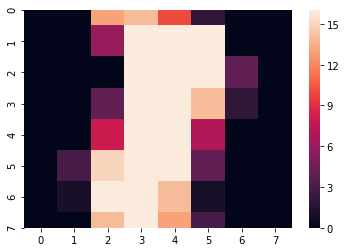

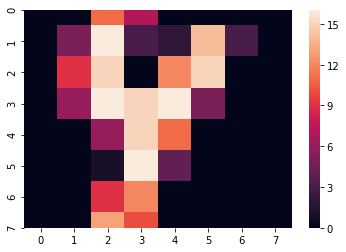

In [162]:
sns.heatmap(x_train[1].reshape((8, 8)))
plt.show()

sns.heatmap(X[1].reshape((8, 8)))
plt.show()

#### 9. You don’t need to report hyperparameter tuning. 
Note that unlike previous assignments, hyperparameter tuning is time-consuming for the MLP model. You
may want to perform an educated tuning of the hyperparameters.

You need to report the optimal values of the hyperparameters that you used for
training. For hyperparameter tuning, the following parameters should have
following fixed setting. [16 pts]

- regularizer=“l2”
- verbose=True
- early_stopping=True
- validation_fraction=0.1


Find the optimal values for the following hyperparameters.

- hidden_layer_neurons
- activation
- alpha
- learning_rate
- learning_rate_init
- max_iter
- tol
- n_iter_no_change

#### 10. Your jupyter notebook should display the following items. 
**You will not get any credit if your jupyter notebook doesn’t have these items displayed during your
submission.**

Additionally, submit a PDF file containing the following items. [2 + 6 + 10 + 10 = 28 pts]

##### a) Epoch number, Training loss, validation loss, validation score, and step size (eta). 
This should be displayed as a single row, as follows. There should be max_iter number of rows, one for each epoch

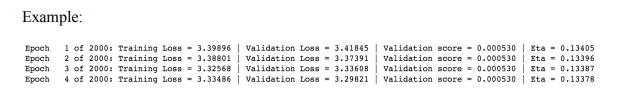

If the program terminates early, then it should display the following message:
Early stopping because the validation score change between two consecutive epochs is less
than (value of “tol”) over the last (value of “n_iter_no_change”) epochs.

##### b) Two graphs:
- First graph plots both training loss and validation loss against epochs.
- Second graph plots validation score vs epochs

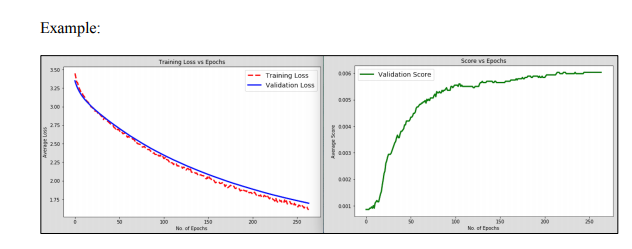

##### c) For training data: accuracy, no. of correct predictions, confusion matrix, precision, recall, f1 score for each class.

##### d) For test data: accuracy, no. of correct predictions, confusion matrix, precision, recall, f1 score for each class.

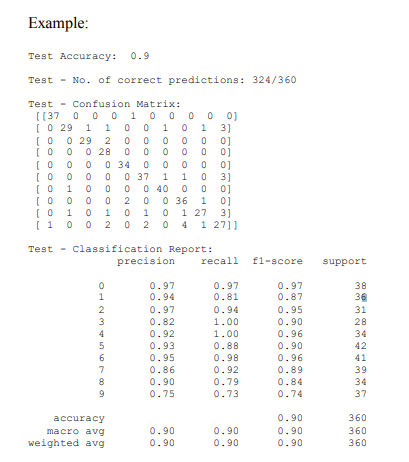

# NOTE

Note that if your test accuracy is less than 90% you will lose 10% of the
total obtained points. If your test accuracy is less than 80% you will lose 30%
of the total obtained points.

## Binary Classification using MLPClassifier

#### 11. [Extra Credit for 478 & mandatory for 878] Using the MLPClassifier perform  binary classification on the handwritten digits dataset to recognize the digits “5” and “not-5”. Report steps (9) and (10). [30 pts] 

#### 12. [Extra Credit for both 478 & 878] Implement a Multi-Layer Perceptron regressor (a MLPRegressor class) with a single hidden layer.  [20 pts]
The model implements the backpropagation algorithm. To optimize the process of updating
the weight matrices, it uses the Stochastic Gradient Descent (SGD) algorithm.
Report steps (9) and (10). Use the red wine quality dataset from:
http://archive.ics.uci.edu/ml/datasets/Wine+Quality
 